In [2]:
from urllib.request import urlopen
import requests
import webbrowser
from bs4 import BeautifulSoup
import json
import pandas as pd
import os
import requests,re
import numpy as np

cid = '57023246'
html = str('https://api.bilibili.com/x/v1/dm/list.so?oid=')+cid
response = requests.get(html)
contents = response.content
html_doc = contents.decode('utf-8')
# print(html_doc)
soup = BeautifulSoup(html_doc, 'lxml')
# print(soup.prettify())

attrb = {}
danmu = {}
contents = soup.find_all(name = 'd')
for i in range(len(contents)):
    attrb[i]=contents[i]['p'].split(',')
    del contents[i]['p']
    danmu[i]=contents[i].string
    
# print(attrb)
newdanmu=[]
newattrb=[]
for index, value in attrb.items():
    newattrb.append(attrb[index])
    newdanmu.append(danmu[index])

    
columns = len(newattrb[0])
newattrb = np.reshape(newattrb, (index+1,columns))
newdanmu = np.reshape(newdanmu, (index+1,1))
dfattrb = pd.DataFrame(data = newattrb,columns = ['Appear Time(sec)','Type of BarrageInt','Size','Color','Time Stamp','Barrage Pool','Sender ID','rowID for Historical Barrage'])
dfdanmu = pd.DataFrame(data = newdanmu,columns = ['Content'])


In [3]:
newcolumn = []
for i in dfattrb['Type of BarrageInt']:
    if (i == '1' or i == '2' or i == '3'):
        newcolumn.append('滚动弹幕')
    elif (i=='4'):
        newcolumn.append('底端弹幕')
    elif(i=='5'):
        newcolumn.append('顶端弹幕')
    elif(i=='6'):
        newcolumn.append('逆向弹幕')
    elif(i=='7'):
        newcolumn.append('精准定位')
    elif(i=='8'):
        newcolumn.append('高级弹幕')
# newcolumn
dfattrb.insert(loc=2,column = 'Type of Barrage',value=newcolumn)
newcolumn = []


df = dfattrb.join(dfdanmu)
df.iloc[:,0]=df.iloc[:,0].astype(float)
df

,Appear Time(sec),Type of BarrageInt,Type of Barrage,Size,Color,Time Stamp,Barrage Pool,Sender ID,rowID for Historical Barrage,Content
0,611.747,1,滚动弹幕,25,16777215,1546766659,0,a70b73c1,10288881965989890,？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？
1,617.025,1,滚动弹幕,25,16777215,1546766665,0,a70b73c1,10288884712734722,？？？？？？？？？？？？？？？？？？？？？？？？？？
2,657.304,1,滚动弹幕,25,16777215,1546766705,0,a70b73c1,10288905854124032,？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？
3,624.323,1,滚动弹幕,25,16777215,1546766672,0,a70b73c1,10288888577785858,？？？？？？？？？？？？？？？？？？？？？？？？？？？
4,761.408,1,滚动弹幕,25,52480,1546766809,0,a70b73c1,10288960426213378,？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？
5,598.979,1,滚动弹幕,25,16777215,1546770286,0,90d59a5b,10290783553847296,哈哈哈哈哈哈
6,604.744,1,滚动弹幕,25,16777215,1546771844,0,4d05a3cd,10291600323248128,啊啊啊啊啊啊啊啊啊啊啊
7,651.144,1,滚动弹幕,25,16777215,1546771891,0,4d05a3cd,10291624727281666,哇啊啊啊啊啊啊啊啊啊啊啊啊啊啊啊
8,763.764,1,滚动弹幕,25,16777215,1546772003,0,4d05a3cd,10291683727507460,666666666666666
9,837.984,1,滚动弹幕,25,16777215,1546772078,0,4d05a3cd,10291722655891460,？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？...


In [4]:
from wordcloud import WordCloud as wc

# convert all barrage into a whole String variable
allbarrage = ''
for i in df['Content']:
    allbarrage+=str(i)

wordcloud = wc(font_path = r'C:\Windows\Fonts\simhei.ttf', background_color="white",width=1000, height=860, margin=2).generate(allbarrage)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
import os
print(os.getcwd())
wordcloud.to_file('test.png')
df.to_csv('barrage.csv',encoding='utf_8_sig')

D:\LANGUAGE\Jupyter\Untitled Folder\ImageProcessing


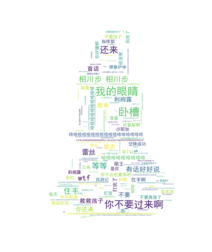

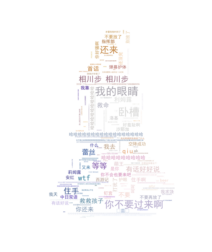

In [5]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

alice_coloring = np.array(Image.open("alice.png")) # convert alice.png to a 3-D array

# 设置停用词
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords

# 通过 mask 参数来设置词云形状
newwc = WordCloud(font_path = r'C:\Windows\Fonts\simhei.ttf',
                  background_color="white",max_words=2000,mask=alice_coloring,
                 stopwords=STOPWORDS,max_font_size=40,random_state=42)
newwc.generate(allbarrage)

# 从 alice.png 创建色彩
image_colors = ImageColorGenerator(alice_coloring)

# 显示图片
plt.imshow(newwc,interpolation='bilinear')
plt.axis('off')
plt.figure()
newwc.to_file('test1.png')

# 自定义词云颜色的 另一种方法
plt.imshow(newwc.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis('off')
plt.figure()
newwc.to_file('test2.png')


Text(0.5,1,'Histogram of Barrage')

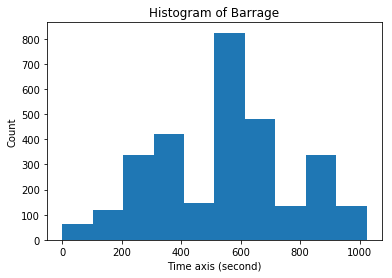

In [6]:
import numpy as np
plt.figure()
plt.hist(df.iloc[:,0])
plt.xlabel('Time axis (second)')
plt.ylabel('Count')
plt.title('Histogram of Barrage')